# Knowledge Distillation for Model Compression

This notebook demonstrates knowledge distillation using teacher and student neural networks on synthetic regression data. We:
1. Generate synthetic data.
2. Train a large teacher model.
3. Train a smaller student model to mimic the teacher's predictions.
4. Compare performance and visualize prediction alignment.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## Generate Synthetic Data

In [2]:
np.random.seed(0)
n_samples = 1000
X = np.random.uniform(-3, 3, size=(n_samples, 1))
y = np.sin(X).ravel() + 0.1 * np.random.randn(n_samples)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Teacher Model

With two hidden layers, each with 100 neurons

In [3]:
teacher = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu',
                             solver='adam', max_iter=1000, random_state=0)
teacher.fit(X_train, y_train)

# Evaluate teacher
y_teacher_pred = teacher.predict(X_test)
teacher_mse = mean_squared_error(y_test, y_teacher_pred)
print(f"Teacher Test MSE: {teacher_mse:.4f}")

Teacher Test MSE: 0.0093


## Train Student Model on Teacher Predictions

Student model is with one hidden layer of 20 neurons. Just to simplify, we trained the student model on the predictions by the teacher model only (i.e, includes only distillation loss).

In [6]:
# Use teacher predictions as soft targets
y_teacher_train = teacher.predict(X_train)

student = MLPRegressor(hidden_layer_sizes=(20,), activation='relu',
                       solver='adam', max_iter=1000, random_state=0)
student.fit(X_train, y_teacher_train)

# Evaluate student
y_student_pred = student.predict(X_test)
student_mse = mean_squared_error(y_test, y_student_pred)
print(f"Student Test MSE: {student_mse:.4f}")

Student Test MSE: 0.0408


## Compare Predictions

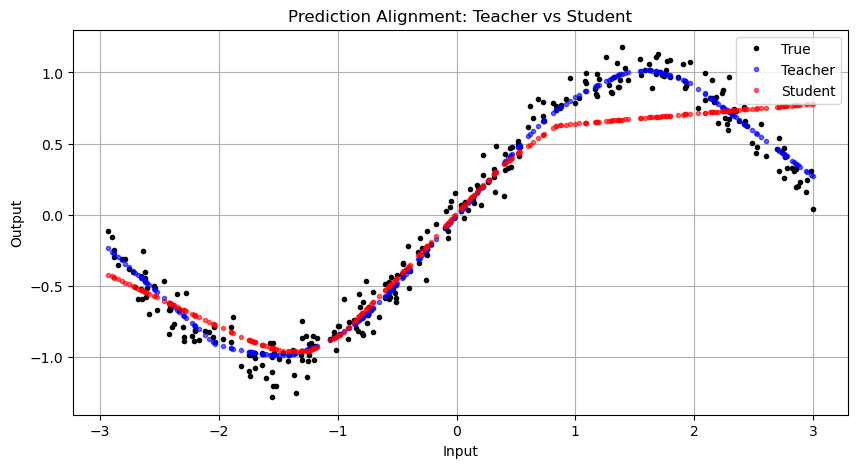

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, 'k.', label='True')
plt.plot(X_test, y_teacher_pred, 'b.', alpha=0.6, label='Teacher')
plt.plot(X_test, y_student_pred, 'r.', alpha=0.6, label='Student')
plt.legend()
plt.title("Prediction Alignment: Teacher vs Student")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

## Summary
- The teacher model is large and accurate.
- The student model is smaller and trained to mimic the teacher.
- Despite its smaller size, the student approximates the teacher's predictions well.
- This demonstrates knowledge distillation for model compression.